In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Installing required Libraries
!pip install textract
!pip install -U nltk
!pip install pdfminer3
!pip install mammoth
!pip install locationtagger

     |████████████████████████████████| 5.6 MB 24.0 MB/s 
     |████████████████████████████████| 8.9 MB 41.9 MB/s 
     |████████████████████████████████| 32.8 MB 37 kB/s 
     |████████████████████████████████| 111 kB 58.8 MB/s 
     |████████████████████████████████| 103 kB 64.6 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 73 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 73.5 MB/s 
     |████████████████████████████████| 1.9 MB 67.7 MB/s 
     |████████████████████████████████| 148 kB 62.9 MB/s 
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=55a2a886a59192d99ed339113435b56cd9df8165965fe02c2b34861bdb3c6433
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
  Created wheel for EbookLib: filename=EbookLib-0.17.1-py3-none-any.whl size=38183 sha256=2fc17937f83f9a6e32718

     |████████████████████████████████| 1.5 MB 32.4 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 5.0 MB 24.7 MB/s 
  Created wheel for pdfminer3: filename=pdfminer3-2018.12.3.0-py3-none-any.whl size=117825 sha256=0c0ddac90734ef0bc23a275fc0ccbb2b6a72579e88bc0d5d1cdc6440a45a4235
  Stored in directory: /root/.cache/pip/wheels/f6/1b/21/339d1825e274c4a9829233a986f93dcedb98913f98e85b2916
Successfully built pdfminer3
     |████████████████████████████████| 51 kB 40 kB/s 
  Created wheel for cobble: filename=cobble-0.1.3-py3-none-any.whl size=11720 sha256=3e4af31ad6a763688bddd0fde2f96d46df3b7195166424b75a6909268ab4f137
  Stored in directory: /root/.cache/pip/wheels/33/eb/57/15dd299e2aa1895b3d6a06e92da365403f654ec9986f974481
Successfully built cobble
     |████████████████████████████████| 1.6 MB 36.3 MB/s 
     |████████████████████████████████| 10.1 

In [ ]:
# Importing required libraries
import pandas as pd
from pdfminer3.layout import LAParams
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import TextConverter
import io
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import en_core_web_sm
nlp = en_core_web_sm.load()
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import mammoth
import  locationtagger
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import wordnet
nltk.download('wordnet')
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Making directory of Resumes and Job Description and save all the downloaded datasets here
directory = '/content/drive/MyDrive/'
resume_path = directory + 'Resumes/'
jd_path = directory + 'JD/'

# Reading Documents

In [ ]:
3
#This function is used to extract text from pdf file. It can also extract tables from a pdf file
def pdf_extractor(path):
    r_manager = PDFResourceManager()
    output = io.StringIO()
    converter = TextConverter(r_manager, output, laparams=LAParams())
    p_interpreter = PDFPageInterpreter(r_manager, converter)
    with open(path, 'rb') as file:
      for page in PDFPage.get_pages(file,caching=True,check_extractable=True):
         p_interpreter.process_page(page)
         text = output.getvalue()
    converter.close()
    output.close()

    return text

In [ ]:
# A function for reading pdf, docx, doc and txt files
def read_files(file_path):
  fileTXT = []
  for filename in os.listdir(file_path):
    # If the document is in pdf format then this code will be executed
    if(filename.endswith(".pdf")):
        try:
            fileTXT.append(pdf_extractor(file_path+filename)) # Here the pdf_extractor function is used to extract pdf file
        except Exception:
            print('Error reading pdf file :' + filename)
    # If the document is in docx format then this code will be executed
    if(filename.endswith(".docx")):
        try:
          with open(file_path + filename, "rb") as docx_file:
            result = mammoth.extract_raw_text(docx_file)
            text = result.value
            fileTXT.append(text)
        except IOError:
           print('Error reading .docx file :')
    # If the given document is in doc format then this loop will be executed
    if(filename.endswith(".doc")):
        try:
            text = textract.process(file_path+filename).decode('utf-8')     
            fileTXT.append(text)
        except Exception:
            print('Error reading .doc file :' + filename)
    # If the given file in txt format then this file will be executed
    if(filename.endswith(".txt")):
        try:
          myfile = open(file_path+filename, "rt")
          contents = myfile.read()         
          fileTXT.append(contents)
        except Exception:
             print('Error reading .txt file :' + filename)
  return fileTXT

In [ ]:
# Calling the function read_files to read all the resumes
resumeTxt = read_files(resume_path)

In [ ]:
resumeTxt[0]

'Aman Sharma \n\nCampus Address                         aman.sharma2016@vitstudent.ac.in \nMHA, VIT Chennai \nChennai, \nTamil Nadu  \n \n \n\nCell-7550171006 \n\nPermanent Address \n6/E, Street-27, \nSector-1, Bhilai, \nChhattisgarh \n\n \n\n \n\n \nOBJECTIVE \n \nEDUCATION \n \n \n \n \n \n \n \n \n \n \n \nDATE OF BIRTH \n \nLANGUAGES \nKNOWN \n \nCOURSEWORK \n \n \n \n \nCOMPUTER \nSKILLS \n \n, \n \nEXPERIENCE \n \n \n \n \n \n \n \n \n \n \n \n \nACTIVITIES \n\nSeeking to leverage my technical knowledge to grow in your company. \n\nVellore Institute of Technology, Chennai (T.N.) \nBachelor of Computing Science and Engineering \nCGPA: 9.27/10.0 (Till III semester), to be awarded May 2020 \n \nSenior Secondary School, Sector-10, Bhilai (C.G) \nHSC (Class XII), CBSE \nPercentage: 86.80, awarded May 2015 \n\nSenior Secondary School, Sector-10, Bhilai(C.G.) \nSSC (Class XII), CBSE \nCGPA: 10/10, awarded May 2013 \n\n10-October-1997 \n\nHindi and English \n\nObject Oriented Programming

In [ ]:
# Calling the function read_files to read all the JD's
jdTxt = read_files(jd_path)

In [ ]:
jdTxt[0]

'Position \n\nDesignation \n\nDepartment \n\nJob Location \n\nPosition Type  \n\nJob Description \n\nDeveloper – JAVA  \n\nDeveloper – JAVA \n\nMAP IT  \n\nBhopal \n\n  Contractual upto 2 years. Extendable basis performance \n\n \n\n \n  Job Objective \nObjective  of  this  job  is  to  part  of  development  teams  (open-source)  for  IT  projects;  Evaluate \nTechnical  architectures  and  provide  recommendations  ;  collaborate  with  DCO  /CT  teams  at  data \ncentre, software development teams, Infrastructure outsourcing team, DBAs , network administrator \nas  a  consortium      ;  Participate  &  own  data  centre  upkeep  and  expansion  plans,  Liaison  with  user \ndepartments  for  state  data  centre  usage,  upkeep  of  client  assets,  own  &  drive  Archival/  back  up/ \nRestoration  policies,  Benchmark  new  technologies;  work  on  continuous  upgradation  of  technical \nartifacts. \n\n \n\nCore Responsibilities: \n\n\uf0b7  Software  development  team  member  ; 

# Text Processing 

In [ ]:
# This function helps us in removing stopwords, puntuations marks, special character, extra spaces and numeric data. It also lowercases all the text.
def preprocessing(Txt):
  sw = stopwords.words('english')
  space_pattern = '\s+'
  special_letters = "[^a-zA-Z#]"
  p_txt = []
  for resume in Txt:
    text = re.sub(space_pattern, ' ', resume)
    text = re.sub(special_letters, ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.split()
    text = [word for word in text if word.isalpha()]
    text = [w for w in text if w not in sw]
    text = [item.lower() for item in text]
    p_txt.append(" ".join(text))
  return p_txt

In [ ]:
# Calling the function preprocessing to to clean all the resumes
p_resumeTxt = preprocessing(resumeTxt)

In [ ]:
p_resumeTxt[0]

'aman sharma campus address aman sharma vitstudent ac mha vit chennai chennai tamil nadu cell permanent address e street sector bhilai chhattisgarh objective education date of birth languages known coursework computer skills experience activities seeking leverage technical knowledge grow company vellore institute technology chennai t n bachelor computing science engineering cgpa till iii semester awarded may senior secondary school sector bhilai c g hsc class xii cbse percentage awarded may senior secondary school sector bhilai c g ssc class xii cbse cgpa awarded may october hindi english object oriented programming digital logic design database management systems data structures algorithms discrete mathematics software engineering computer architecture statistics engineer languages skills python c c r beginner html php javascript sql data structures developer vit vibrance website team participated web hackathon conducted mozilla research area clustering categorical data presented pape

In [ ]:
# Calling the function preprocessing to to clean all the job description
jds = preprocessing(jdTxt)

In [ ]:
jds[0]

'position designation department job location position type job description developer java developer java map it bhopal contractual upto years extendable basis performance job objective objective job part development teams open source it projects evaluate technical architectures provide recommendations collaborate dco ct teams data centre software development teams infrastructure outsourcing team dbas network administrator consortium participate data centre upkeep expansion plans liaison user departments state data centre usage upkeep client assets drive archival back restoration policies benchmark new technologies work continuous upgradation technical artifacts core responsibilities software development team member interface product principles e spoc single point contact potential candidate shall working entire sdlc framework ide integrated development environments exposure estimation techniques diverse experience utilizing java tools business web client server environments including 

# Text to Features

In [ ]:
# Combining Resumes and Job Description for finding TF-IDF and Cosine Similarity
TXT = p_resumeTxt+jds

In [ ]:
# Finding TF-IDF score of all the resumes and JDs. 
'''
The parameters in TF-IDF are for the following this:
    1) max_df: Remove a feature if the document frequency of the feature is higher than the given value
    2) min_df: Remove a feature if the document frequency of the feature is lower than the given value
    3) ngram: range of number of words that should be combine as a feature
''' 
tfidfvectorizer = TfidfVectorizer(max_df=0.85,min_df=10,ngram_range=(1,3))

# Converting TF-IDF to a DataFrame
tfidf_wm = tfidfvectorizer.fit_transform(TXT)
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect1 = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect1[0:10])


TD-IDF Vectorizer

    ability  acceptance  ...      xslt  years experience
0  0.000000    0.000000  ...  0.000000          0.000000
1  0.033642    0.034728  ...  0.000000          0.015811
2  0.030404    0.094157  ...  0.000000          0.000000
3  0.000000    0.000000  ...  0.017865          0.000000
4  0.000000    0.049453  ...  0.000000          0.015010
5  0.000000    0.000000  ...  0.037084          0.006113
6  0.010359    0.021387  ...  0.000000          0.009737
7  0.060280    0.000000  ...  0.000000          0.000000
8  0.006309    0.006512  ...  0.000000          0.005930
9  0.027994    0.014449  ...  0.000000          0.013157

[10 rows x 988 columns]


# Feature Reduction

In [ ]:
# Defining transformation 
svd = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
transformed = svd.fit_transform(df_tfidfvect1)

In [ ]:
# Converting transformed vector to list
df_vec = transformed.tolist()
# Converting list to DataFrame
df_svd = pd.DataFrame(df_vec)
print('SVD Feature Vector')
print(df_svd[0:10])

SVD Feature Vector
         0         1         2   ...        27        28        29
0  0.124064  0.068055  0.240050  ... -0.007049 -0.006502  0.003656
1  0.362082  0.553922  0.193744  ... -0.025797  0.003932  0.037391
2  0.456873  0.654845 -0.193695  ...  0.069098  0.007034  0.042495
3  0.726913 -0.319597  0.008473  ...  0.013895 -0.014235 -0.003603
4  0.435430  0.705447 -0.178258  ...  0.084570  0.149095 -0.013346
5  0.832300 -0.296318 -0.006792  ... -0.112076  0.227854  0.165388
6  0.494776  0.569386 -0.105892  ...  0.080577  0.009561 -0.060952
7  0.258640  0.376127  0.554150  ... -0.015597  0.001795 -0.003945
8  0.785569 -0.363791 -0.019028  ... -0.096952 -0.019138 -0.102783
9  0.472396  0.683913 -0.172216  ...  0.041386  0.049625  0.022959

[10 rows x 30 columns]


# Model Building

In [ ]:
# Calculating Cosine Similarity between JDs and resumes to find out which resume is the best fit for a job description
similarity = cosine_similarity(df_svd[0:len(resumeTxt)],df_svd[len(resumeTxt):])

In [ ]:
# DataFrame of similarity score
Data=pd.DataFrame(similarity,columns=['Java Developer','Project Manager','Business Analyst'])
print('Cosine Similarity\n')
print(Data[0:10])

Cosine Similarity

   Java Developer  Project Manager  Business Analyst
0        0.107977         0.180878          0.068128
1        0.164169         0.264543          0.265139
2        0.126303         0.182786          0.341395
3        0.408364         0.047575          0.053543
4        0.123725         0.224996          0.371208
5        0.428426         0.080865          0.084784
6        0.235509         0.239328          0.285766
7        0.106679         0.387226          0.167779
8        0.404402         0.050072          0.073850
9        0.126238         0.222074          0.433800


# Extracting Information\Entities

In [ ]:
t = pd.DataFrame({'Original Resume':resumeTxt})
dt = pd.concat([Data,t],axis=1)

In [ ]:
# Function to find phone numbers
def number(text):               
        pattern = re.compile(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)')
        pt = pattern.findall(text)
        pt = [re.sub(r'[,.]', '', ah) for ah in pt if len(re.sub(r'[()\-.,\s+]', '', ah))>9]
        pt = [re.sub(r'\D$', '', ah).strip() for ah in pt]
        pt = [ah for ah in pt if len(re.sub(r'\D','',ah)) <= 15]
        for ah in list(pt):
            if len(ah.split('-')) > 3: continue
            for x in ah.split("-"):
                try:
                    if x.strip()[-4:].isdigit():
                        if int(x.strip()[-4:]) in range(1900, 2100):
                            pt.remove(ah)
                except: pass
        number = None                    
        number = pt
        number = set(number)
        number = list(number)
        return number

In [ ]:
# Calling the number function to get the list of candidate’s numbers 
dt['Phone No.']=dt['Original Resume'].apply(lambda x: number(x))
print("Extracting numbers from dataframe columns:")
dt['Phone No.'][0:5]

Extracting numbers from dataframe columns:


0        [7550171006]
1      [281-212-3592]
2      [970-294-9622]
3    [(669) 261-3506]
4      [703-743-0795]
Name: Phone No., dtype: object

In [ ]:
# Here we are extracting e-mail from the resumes 
def email_ID(text):
     r = re.compile(r'[A-Za-z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
     return r.findall(str(text))

In [ ]:
#  Calling the email_ID function to get the list of candidate’s e-mails
dt['E-Mail ID']=dt['Original Resume'].apply(lambda x: email_ID(x))
print("Extracting e-mail from dataframe columns:")
dt['E-Mail ID'][0:5]

Extracting e-mail from dataframe columns:


0                   [aman.sharma2016@vitstudent.ac.in]
1                              [adhigopalam@gmail.com]
2                     [danny@stackitprofessionals.com]
3                             [bsudabathula@gmail.com]
4    [amirindersingh1234@gmail.com, Praveen@indique...
Name: E-Mail ID, dtype: object

In [ ]:
# Function to remove phone numbers to extract the year of experience and name of a candidate
def rm_number(text):
   try:        
        pattern = re.compile(r'([+(]?\d+[)\-]?[ \t\r\f\v]*[(]?\d{2,}[()\-]?[ \t\r\f\v]*\d{2,}[()\-]?[ \t\r\f\v]*\d*[ \t\r\f\v]*\d*[ \t\r\f\v]*)')
        pt = pattern.findall(text)
        pt = [re.sub(r'[,.]', '', ah) for ah in pt if len(re.sub(r'[()\-.,\s+]', '', ah))>9]
        pt = [re.sub(r'\D$', '', ah).strip() for ah in pt]
        pt = [ah for ah in pt if len(re.sub(r'\D','',ah)) <= 15]
        for ah in list(pt):
            if len(ah.split('-')) > 3: continue
            for x in ah.split("-"):
                try:
                    if x.strip()[-4:].isdigit():
                        if int(x.strip()[-4:]) in range(1900, 2100):
                            pt.remove(ah)
                except: pass 
        number = None                  
        number = pt
        number = set(number)
        number = list(number)
        for i in number:
          text = text.replace(i," ")
        return text
   except:
        pass

In [ ]:
# Calling the function rm_number to remove the phone number
dt['Original']=dt['Original Resume'].apply(lambda x: rm_number(x))

In [ ]:
# Function to remove e-mails to extract the year of experience and name of a candidate
def rm_email(text):
    try:    
        email = None           
        pattern = re.compile('[\w\.-]+@[\w\.-]+')
        pt = pattern.findall(text)
        email = pt
        email = set(email)
        email = list(email)
        for i in email:
          text = text.replace(i," ")
        return text
    except:
        pass

In [ ]:
# Calling the function rm_email to remove the e-mails
dt['Original']=dt['Original'].apply(lambda x: rm_email(x))
print("Resumes with emails and numbers removed :")
dt['Original'][0:5]

Resumes with emails and numbers removed :


0    Aman Sharma \n\nCampus Address                ...
1    Adhi Gopalam\n\n \n\n \n\n\n\nCertified Scrum ...
2    Hyma Gumpu\n\n    \n\nContact No:  \n\nProfile...
3     Name: Balakrishna Sudabathula\n\n  Email:  \n...
4    Amrinder Pelia                                ...
Name: Original, dtype: object

In [ ]:
# Function to extract candidate name
def person_name(text):       
    Sentences = nltk.sent_tokenize(text)
    t = []
    for s in Sentences:
        t.append(nltk.word_tokenize(s)) 
    words = [nltk.pos_tag(token) for token in t]
    n = []
    for x in words:
        for l in x:
            if re.match('[NN.*]', l[1]):
                n.append(l[0])
    Names = []
    for nouns in n:
        if not wordnet.synsets(nouns):
                Names.append(nouns)
    Name = ' '.join(Names[:1])
    return Name

In [ ]:
# Calling the function name to extract the name of a candidate
dt['Candidate\'s Name']=dt['Original'].apply(lambda x: person_name(x))
print("Extracting names from dataframe columns:")
dt['Candidate\'s Name'][0:5]

Extracting names from dataframe columns:


0           Aman
1           Adhi
2           Hyma
3    Balakrishna
4       Amrinder
Name: Candidate's Name, dtype: object

In [ ]:
#function to find the years of experience
def exp(text):

    try: 
        e = []
        p = 0
        text  = text.lower()
        pt1 = re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,7}experience(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,7}", text)
        if(pt1 != None):
            p = pt1.group()
        pt2 = re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,2}year(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,2}", text)
        if(pt2 != None):
            p = pt2.group() 
        pt3 = re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,2}years(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,2}", text)
        if(pt3 != None):
            p = pt3.group()   
    
        if(p == 0):
            return 0
        ep = re.findall('[0-9]{1,2}',p)
        ep_int = list(map(int, ep))
        #print(ep_int)
        for a in ep:
            for b in ep_int:
                if len(a) <= 2 and b < 30:
                    e.append(a)
        ep = ''.join(e[0])
        p1 = re.findall('[0-9]{1,2}.[0-9]{1,2}',p)
    
        exp = []
        if not p1:
            exp.append(ep)
            exp = ''.join(ep)
        else:
            exp.append(p1)
            exp = ''.join(p1)
    except:
        exp=0
    return exp
     

In [ ]:
# Calling the function exp to extract the year of experience of a candidate
dt['Experience']=dt['Original'].apply(lambda x: exp(x))
print("Extracting years of experience from dataframe column:")
dt['Experience'][0:5]

Extracting years of experience from dataframe column:


0     0
1    12
2     7
3    10
4    10
Name: Experience, dtype: object

In [ ]:
skills = pd.read_excel('/content/drive/MyDrive/skills.xlsx')

In [ ]:
skills = skills.values.flatten().tolist()

In [ ]:
i = 0
skill = []
for z in skills:
    r = z.lower()
    skill.append(r)
    i += 1

In [ ]:
# Function to extract skills from candidate's resume
def skills(text):
    sw = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.tokenize.word_tokenize(text)
    
    # remove the punctuation
    ft = [w for w in tokens if w.isalpha()]
    # remove the stop words
    ft = [w for w in tokens if w not in sw]

    # generate bigrams and trigrams (like Machine Learning)
    n_grams = list(map(' '.join, nltk.everygrams(ft, 2, 3)))

    # we create a set to keep the results in.
    fs = set()

    # we text for each token in our skills database
    for token in ft:
        if token.lower() in skill:
            fs.add(token)

    # we text for each bigram and trigram in our skills database
    for ngram in n_grams:
        if ngram.lower() in skill:
            fs.add(ngram)

    return fs

In [ ]:
# Calling the function skills to extract the skills of a candidate
dt['Skills']=dt['Original'].apply(lambda x: skills(x))
print("Extracting skills from dataframe columns:")
dt['Skills'][0:5]

Extracting skills from dataframe columns:


0    {Database Management, Data Structures, SQL, CO...
1    {project management, Java, Word, Excel, Projec...
2    {project management, Business Analysis, SQL, p...
3         {Angular, SQl, SQL, Java, Java Script, JAVA}
4    {GAP Analysis, project management, SQL, Java, ...
Name: Skills, dtype: object

In [ ]:
# Function to extract Location
def location(text):
  place_entity = locationtagger.find_locations(text=text) 
  return place_entity.cities            

In [ ]:
# Calling the function location to extract the location of a candidate
dt['Location']=dt['Original Resume'].apply(lambda x: location(x))
print("Extracting location from dataframe columns:")
dt['Location'][0:5]

Extracting location from dataframe columns:


0                                    [Chennai, Bhilai]
1    [Richmond, Naperville, Salem, Pittsburgh, Balt...
2    [New York, Los Angeles, Rendezvous, Case, Rad,...
3    [Mumbai, Hyderabad, Sunnyvale, Spring, Singlet...
4    [Gap, As, Jackson, Norristown, Cincinnati, Ban...
Name: Location, dtype: object

In [ ]:
#Function to extract Company name 
def CompanyName(text):
    tokens = nlp(str(text))
    x=[]
    for ent in tokens.ents:
      if ent.label_ == 'ORG':
        return ent.text       

In [ ]:
# Calling the function ComapyName to extract past companies of a candidate
dt['Company Name']=dt['Original Resume'].apply(lambda x: CompanyName(x))
print("Extracting Company Name from dataframe columns:")
dt['Company Name'][0:5]

Extracting Company Name from dataframe columns:


0    Vellore Institute of Technology
1                       Infosys Ltd.
2                    Volvo Group Pvt
3                   HCL Technologies
4      Tata Consultancy Services Pvt
Name: Company Name, dtype: object

# Result

In [ ]:
# Final Result for Project Manager
dt[0:10]

,Java Developer,Project Manager,Business Analyst,Original Resume,Phone No.,E-Mail ID,Original,Candidate's Name,Experience,Skills,Location,Company Name
0,0.107977,0.180878,0.068128,Aman Sharma \n\nCampus Address ...,[7550171006],[aman.sharma2016@vitstudent.ac.in],Aman Sharma \n\nCampus Address ...,Aman,0,"{Database Management, Data Structures, SQL, CO...","[Chennai, Bhilai]",Vellore Institute of Technology
1,0.164169,0.264543,0.265139,Adhi Gopalam\n\nadhigopalam@gmail.com\n\n281-2...,[281-212-3592],[adhigopalam@gmail.com],Adhi Gopalam\n\n \n\n \n\n\n\nCertified Scrum ...,Adhi,12,"{project management, Java, Word, Excel, Projec...","[Richmond, Naperville, Salem, Pittsburgh, Balt...",Infosys Ltd.
2,0.126303,0.182786,0.341395,Hyma Gumpu\n\n danny@stackitprofessionals.co...,[970-294-9622],[danny@stackitprofessionals.com],Hyma Gumpu\n\n \n\nContact No: \n\nProfile...,Hyma,7,"{project management, Business Analysis, SQL, p...","[New York, Los Angeles, Rendezvous, Case, Rad,...",Volvo Group Pvt
3,0.408364,0.047575,0.053543,Name: Balakrishna Sudabathula\n\n Email: bsu...,[(669) 261-3506],[bsudabathula@gmail.com],Name: Balakrishna Sudabathula\n\n Email: \n...,Balakrishna,10,"{Angular, SQl, SQL, Java, Java Script, JAVA}","[Mumbai, Hyderabad, Sunnyvale, Spring, Singlet...",HCL Technologies
4,0.123725,0.224996,0.371208,Amrinder Pelia ...,[703-743-0795],"[amirindersingh1234@gmail.com, Praveen@indique...",Amrinder Pelia ...,Amrinder,10,"{GAP Analysis, project management, SQL, Java, ...","[Gap, As, Jackson, Norristown, Cincinnati, Ban...",Tata Consultancy Services Pvt
5,0.428426,0.080865,0.084784,AMULYA KOMATINENI\n\n(515)309-1612\n\namulya.j...,[(515)309-1612],[amulya.javadeveloper@gmail.com],AMULYA KOMATINENI\n\n \n\n \n\n\n\n8+ years of...,AMULYA,8,"{java, Angular, Customer Service, project mana...","[Hyderabad, Jar, Chicago, New York, Spring, Ka...",Goldman Sachs
6,0.235509,0.239328,0.285766,Kashyap K. Vora\n\nPhone: 201-532-6397. Email:...,[201-532-6397],[kashyapkvora@gmail.com],Kashyap K. Vora\n\nPhone: . Email: \n\n_____...,Kashyap,10,"{SQL, Business Analysis, gap analysis, data mi...","[Mumbai, Gap, Warren, Baltimore, Richardson, U...",SAP
7,0.106679,0.387226,0.167779,"\n\nJagan, MSA (US Citizen)\n\n⬤ +1 (248) 41...","[+1 (248) 412-1658, (248) 412-1658]","[jagansrconsult@gmail.com, jagansrconsult@gmai...","\n\nJagan, MSA (US Citizen)\n\n⬤ ⬤ \n\nSE...",Jagan,20,"{Information Technology, Cloud Computing, Big ...","[Chennai, Change, Riyadh, Chicago, New York, P...",Tata Motors LTD
8,0.404402,0.050072,0.073850,\n\n ...,[414-858-6880],[NANDYALARAMAKARTHIK1@GMAIL.COM],\n\n ...,KARTHIK,8,"{Angular, java, Operating Systems, sql, SQL, J...","[Hyderabad, Virginia, Birmingham, Richmond, Sp...",Tata Consultancy LTD
9,0.126238,0.222074,0.433800,Mounika10200@gmail.com ...,[414-909-0756],[Mounika10200@gmail.com],...,Mounika,8,"{Operating Systems, analytical skills, Informa...","[Gap, Moscow, As, Lead, Strong, China, Us, Atl...",China Life Insurance company and Information


In [ ]:
pm = dt[['Project Manager','Candidate\'s Name','Phone No.','E-Mail ID','Skills','Experience', 'Location','Company Name']]

In [ ]:
# Here we are sorting the jd and resume so that in final result we get the rank list of the resume for their respective jd
pm=pm.sort_values(by='Project Manager',ascending=False)

In [ ]:
pm[0:10]

,Project Manager,Candidate's Name,Phone No.,E-Mail ID,Skills,Experience,Location,Company Name
17,0.448199,Priya,[+1 503-536-2757],[manjunath@nichesoftsolutions.com],"{Java Servlets, Microsoft Access, Risk Assessm...",7,"[Mumbai, Delhi, Gurgaon, London, Vas, Mena, Me...",Daimler Company
7,0.387226,Jagan,"[+1 (248) 412-1658, (248) 412-1658]","[jagansrconsult@gmail.com, jagansrconsult@gmai...","{Information Technology, Cloud Computing, Big ...",20,"[Chennai, Change, Riyadh, Chicago, New York, P...",Tata Motors LTD
19,0.295847,Ajay,[+1 (847)899-4194],[ajaydt@gmail.com],"{Project management, risk assessment, GAP Anal...",14,"[Kolkata, Sale, New York, Pittsburgh, Singapor...",LIC Company
18,0.284137,Mahesh,[+18327758735],[asmith@nichesoftsolutions.com],"{organizational skills, Project Planning, soft...",17,"[Bangalore, March, Lenexa, Core, Usa, Leader, ...",TCS
1,0.264543,Adhi,[281-212-3592],[adhigopalam@gmail.com],"{project management, Java, Word, Excel, Projec...",12,"[Richmond, Naperville, Salem, Pittsburgh, Balt...",Infosys Ltd.
27,0.260352,Shail,[646442 9382],[shailjtank@gmail.com],"{Project Management, database design, Decision...",9,"[Gap, London, March, As, Minneapolis, Parsippa...",Sony Company
6,0.239328,Kashyap,[201-532-6397],[kashyapkvora@gmail.com],"{SQL, Business Analysis, gap analysis, data mi...",10,"[Mumbai, Gap, Warren, Baltimore, Richardson, U...",SAP
4,0.224996,Amrinder,[703-743-0795],"[amirindersingh1234@gmail.com, Praveen@indique...","{GAP Analysis, project management, SQL, Java, ...",10,"[Gap, As, Jackson, Norristown, Cincinnati, Ban...",Tata Consultancy Services Pvt
9,0.222074,Mounika,[414-909-0756],[Mounika10200@gmail.com],"{Operating Systems, analytical skills, Informa...",8,"[Gap, Moscow, As, Lead, Strong, China, Us, Atl...",China Life Insurance company and Information
24,0.211687,Madhuri,[484 754 6872],[madurichand@gmail.com],"{risk assessment, GAP Analysis, database desig...",7,"[Hyderabad, Wilmington, Anchorage, Bloomfield,...",AmerisourceBergen Company


In [ ]:
pm[0:10].to_excel('Project_Manager.xlsx')

In [ ]:
ba = dt[['Business Analyst','Candidate\'s Name','Phone No.','E-Mail ID',
       'Skills','Experience', 'Location','Company Name']]

In [ ]:
# Here we are sorting the jd and resume so that in final result we get the rank list of the resume for their respective jd
ba=ba.sort_values(by='Business Analyst',ascending=False)

In [ ]:
ba[0:10]

,Business Analyst,Candidate's Name,Phone No.,E-Mail ID,Skills,Experience,Location,Company Name
9,0.433800,Mounika,[414-909-0756],[Mounika10200@gmail.com],"{Operating Systems, analytical skills, Informa...",8,"[Gap, Moscow, As, Lead, Strong, China, Us, Atl...",China Life Insurance company and Information
24,0.391456,Madhuri,[484 754 6872],[madurichand@gmail.com],"{risk assessment, GAP Analysis, database desig...",7,"[Hyderabad, Wilmington, Anchorage, Bloomfield,...",AmerisourceBergen Company
15,0.385279,Dhanalaxmi,[916-282-9259],[sam@vishconsultingservices.com],"{Project Planning, Business Analysis, SQL, gap...",7,"[Pune, Change, Tampa, Jacksonville, Sacramento...",IBM Company
4,0.371208,Amrinder,[703-743-0795],"[amirindersingh1234@gmail.com, Praveen@indique...","{GAP Analysis, project management, SQL, Java, ...",10,"[Gap, As, Jackson, Norristown, Cincinnati, Ban...",Tata Consultancy Services Pvt
2,0.341395,Hyma,[970-294-9622],[danny@stackitprofessionals.com],"{project management, Business Analysis, SQL, p...",7,"[New York, Los Angeles, Rendezvous, Case, Rad,...",Volvo Group Pvt
27,0.324604,Shail,[646442 9382],[shailjtank@gmail.com],"{Project Management, database design, Decision...",9,"[Gap, London, March, As, Minneapolis, Parsippa...",Sony Company
19,0.324550,Ajay,[+1 (847)899-4194],[ajaydt@gmail.com],"{Project management, risk assessment, GAP Anal...",14,"[Kolkata, Sale, New York, Pittsburgh, Singapor...",LIC Company
6,0.285766,Kashyap,[201-532-6397],[kashyapkvora@gmail.com],"{SQL, Business Analysis, gap analysis, data mi...",10,"[Mumbai, Gap, Warren, Baltimore, Richardson, U...",SAP
17,0.285576,Priya,[+1 503-536-2757],[manjunath@nichesoftsolutions.com],"{Java Servlets, Microsoft Access, Risk Assessm...",7,"[Mumbai, Delhi, Gurgaon, London, Vas, Mena, Me...",Daimler Company
13,0.275595,A.N.DINESHKUMARR,"[9944819797, +91 9538820898]",[andineshkumarr@yahoo.com],"{Business Analysis, SQL}",3,"[Bangalore, Chennai, Hyderabad, London, Geneva...",Morgan stanley company


In [ ]:
ba[0:10].to_excel('Business_Analyst.xlsx')

In [ ]:
jad = dt[['Java Developer','Candidate\'s Name','Phone No.','E-Mail ID',
       'Skills','Experience', 'Location','Company Name']]

In [ ]:
# Here we are sorting the jd and resume so that in final result we get the rank list of the resume for their respective jd.
jad=jad.sort_values(by='Java Developer',ascending=False)

In [ ]:
jad[0:10]

,Java Developer,Candidate's Name,Phone No.,E-Mail ID,Skills,Experience,Location,Company Name
20,0.459094,Siddharth,[(646) 494-6583],[siddhartha.g225@gmail.com],"{Angular, Data structures, Big Data, debugging...",9,"[Bangalore, As, San Francisco, Spring, Fort Wo...",Volvo Company
25,0.451500,Manohar,[(614) 285-5486],[manohar.r7754@gmail.com],"{Angular, java, Operating Systems, cloud compu...",4,"[As, Spring, Atlanta, East Hanover, Newark, Mo...",Samsung Company
12,0.450859,VARUN,[601 651 0507],[Varunkumar.work@gmail.com601],"{Angular, java, Cloud Computing, project manag...",8,"[Spring, Dallas, Enterprise, Eureka, Page, Kum...",SAP Company
26,0.438464,KIRAN,[510-770-6277],[kumarjava174@gmail.com],"{Angular, java, contract negotiation, Operatin...",8,"[Malvern, Jar, Chicago, Houston, Spring, Mobil...",Accenture Company
10,0.437803,Nithin,[214-509-7784],[nithin7445@gmail.com],"{java, Angular, Java Servlets, Information Tec...",8,"[Jar, Spring, Austin, San Antonio, Columbia, P...",Amazon Company
11,0.433409,Kumar,[469 524 9207],[naveenkumar.java18@gmail.com],"{java, Angular, Operating Systems, Data struct...",8,"[Bangalore, Spring, Dallas, Enterprise, Eureka...",Google Company
14,0.429513,Avinash,[913-730-0694],[Avinash87.java@gmail.com],"{Angular, java, Java Servlets, debugging, SQL,...",8,"[Hyderabad, New York, Sunnyvale, Spring, Trent...",SAP Company
5,0.428426,AMULYA,[(515)309-1612],[amulya.javadeveloper@gmail.com],"{java, Angular, Customer Service, project mana...",8,"[Hyderabad, Jar, Chicago, New York, Spring, Ka...",Goldman Sachs
21,0.425585,Sudhakar,[201-535-3300],[psrleo81@gmail.com],"{java, Angular, organizational skills, Data St...",9,"[Washington, New York, Naperville, Spring, Sta...",SAP Company
3,0.408364,Balakrishna,[(669) 261-3506],[bsudabathula@gmail.com],"{Angular, SQl, SQL, Java, Java Script, JAVA}",10,"[Mumbai, Hyderabad, Sunnyvale, Spring, Singlet...",HCL Technologies


In [ ]:
jad[0:10].to_excel('Java_Developer.xlsx')

# Visualization

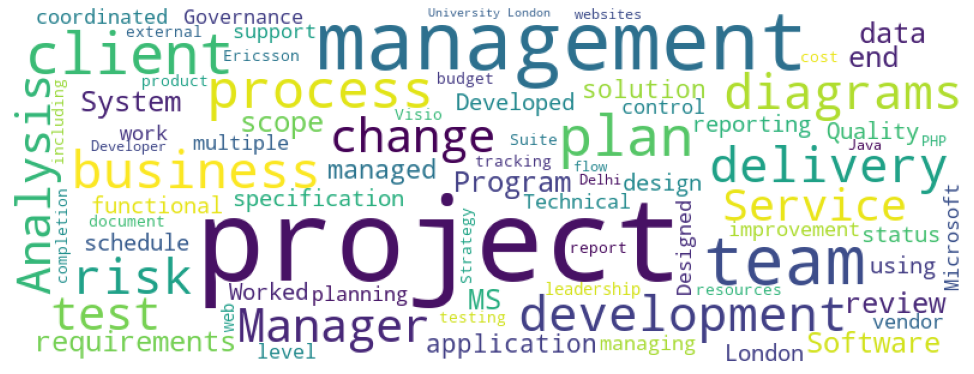

In [29]:
# Create and generate a word cloud image for the best candidate for Project manager
wordcloud = WordCloud(width = 800, height = 300,background_color ='white',min_font_size = 10).generate(resumeTxt[17])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

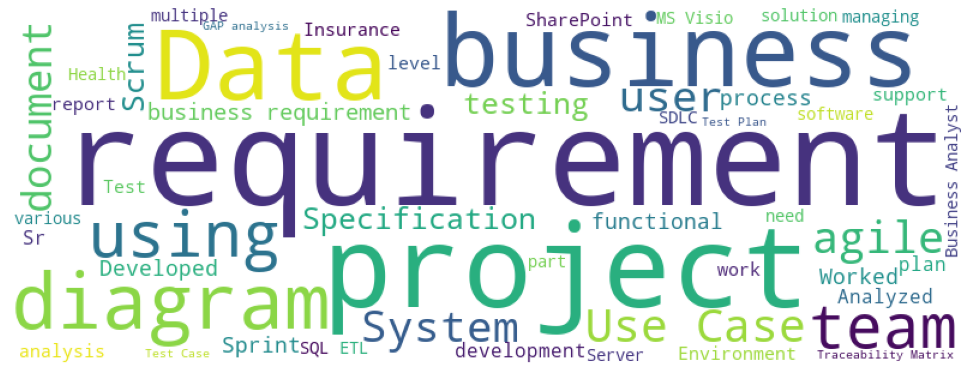

In [30]:
# Create and generate a word cloud image for the best candidate for Business Analyst
wordcloud = WordCloud(width = 800, height = 300,background_color ='white',min_font_size = 10).generate(resumeTxt[9])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

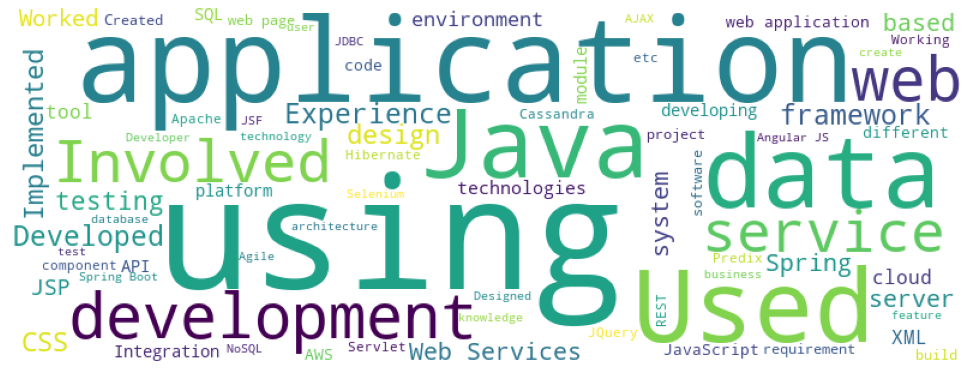

In [31]:
# Create and generate a word cloud image for the best candidate for Java Developer
wordcloud = WordCloud(width = 800, height = 300,background_color ='white',min_font_size = 10).generate(resumeTxt[20])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

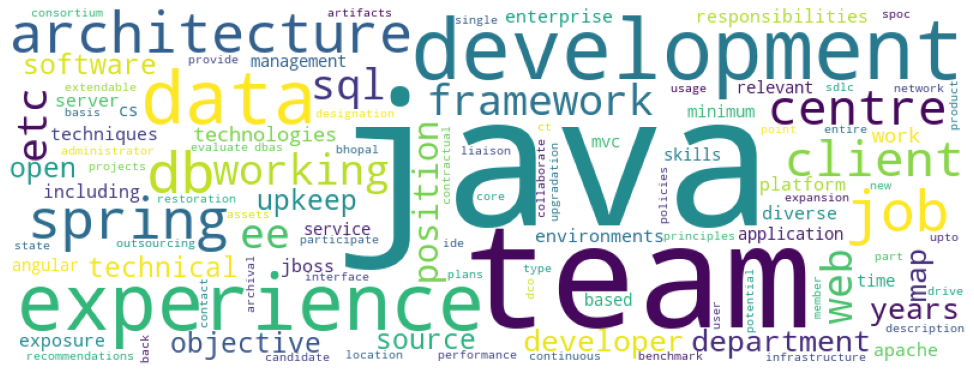

In [28]:
# Create a world cloud of job description of a Java Developer
wordcloud = WordCloud(width = 800, height = 300,background_color ='white',min_font_size = 10).generate(jds[0])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

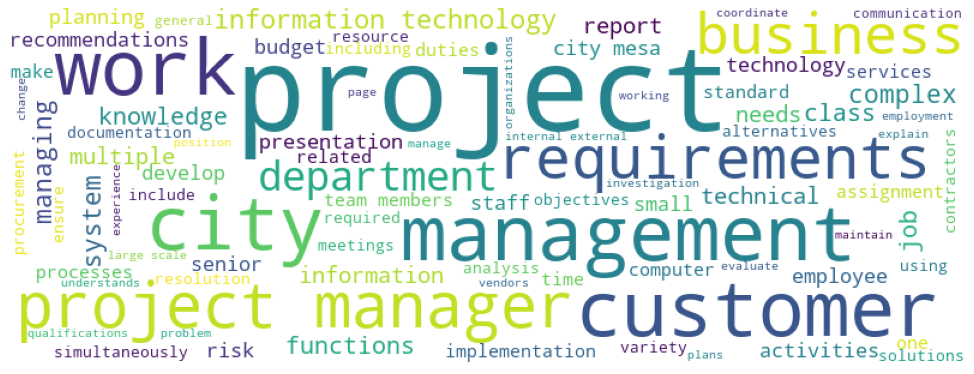

In [32]:
# Create a world cloud of job description of a Project Management
wordcloud = WordCloud(width = 800, height = 300,background_color ='white',min_font_size = 10).generate(jds[1])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

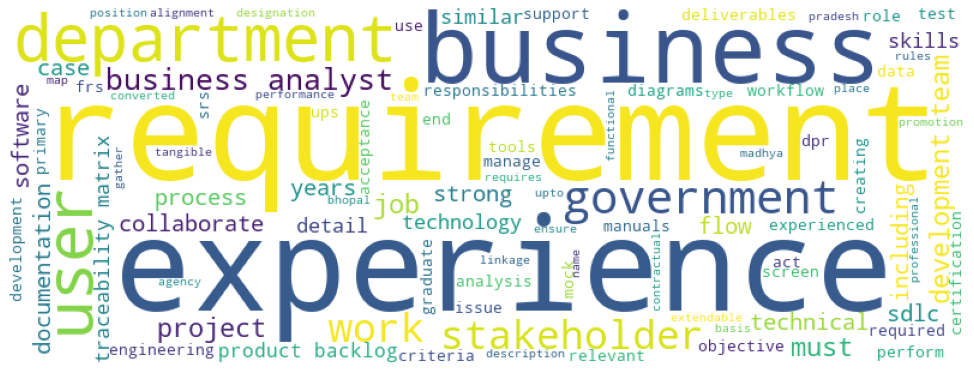

In [33]:
# Create a world cloud of job description of a business analyst 
wordcloud = WordCloud(width = 800, height = 300,background_color ='white',min_font_size = 10).generate(jds[2])

# Display the generated image
plt.figure(figsize = (20, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()